**klasyfikacja, czy przyznać kartę kredytową**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
**X1**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
**X2**: Gender (1 = male; 2 = female).
**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
**X4**: Marital status (1 = married; 2 = single; 3 = others).
**X5**: Age (year).
**X6 - X11**: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
**X12-X17**: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
**X18-X23**: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [3]:
# Ścieżka do pliku
plik = "default_of_credit_card_clients.xlsx"
df = pd.read_excel(plik)
print(df.head())

  Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23             

konieczność usunięcia pierwszego wiersza (lub drugiego); usunięcie pierwszej kolumny; sprawdzenie braków; sprawdzenie czy dane są zgodne z opisem (warianty)

In [4]:
df = pd.read_excel(plik, header=1)  # Nagłówki w drugim wierszu

In [5]:
df = df.drop(df.columns[0], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [7]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
df.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [9]:
df['default payment next month'].unique()

array([1, 0], dtype=int64)

In [10]:
liczba_y = df['default payment next month'].value_counts()

In [11]:
liczba_y

default payment next month
0    23364
1     6636
Name: count, dtype: int64

jest więcej 0 (brak przyznania)

In [13]:
df['EDUCATION'].unique() # (1 = graduate school; 2 = university; 3 = high school; 4 = others)

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [14]:
df['EDUCATION'].value_counts().sort_index()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64

In [15]:
df['MARRIAGE'].unique() # (1 = married; 2 = single; 3 = others)

array([1, 2, 3, 0], dtype=int64)

In [16]:
df['MARRIAGE'].value_counts().sort_index()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64

In [17]:
df['MARRIAGE'] = np.where(df['MARRIAGE']==0, 3, df['MARRIAGE'])
df['EDUCATION'] = np.where(df['EDUCATION']==0, 4, df['EDUCATION'])
df['EDUCATION'] = np.where(df['EDUCATION']==5, 4, df['EDUCATION'])
df['EDUCATION'] = np.where(df['EDUCATION']==6, 4, df['EDUCATION'])

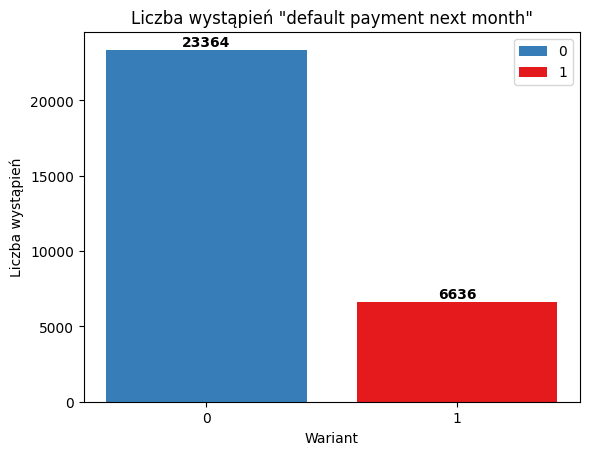

In [12]:
# Tworzenie wykresu słupkowego z dwoma słupkami
bars = plt.bar(liczba_y.index, liczba_y.values, color=['#377EB8', '#E41A1C'], label=['0', '1'])

# Dodanie tytułu i etykiet
plt.title('Liczba wystąpień "default payment next month"')
plt.xlabel('Wariant')
plt.ylabel('Liczba wystąpień')

# Dodanie etykiet z liczbą na słupkach
for bar in bars:
    yval = bar.get_height()  # Wysokość słupka
    plt.text(bar.get_x() + bar.get_width()/2, yval, str(int(yval)), 
             ha='center', va='bottom', fontweight='bold', color='black')

# Dodanie legendy w prawym górnym rogu
plt.legend(loc='upper right')

# Ustawienie etykiet osi X na 0 i 1
plt.xticks([0, 1])

# Wyświetlenie wykresu
plt.show()

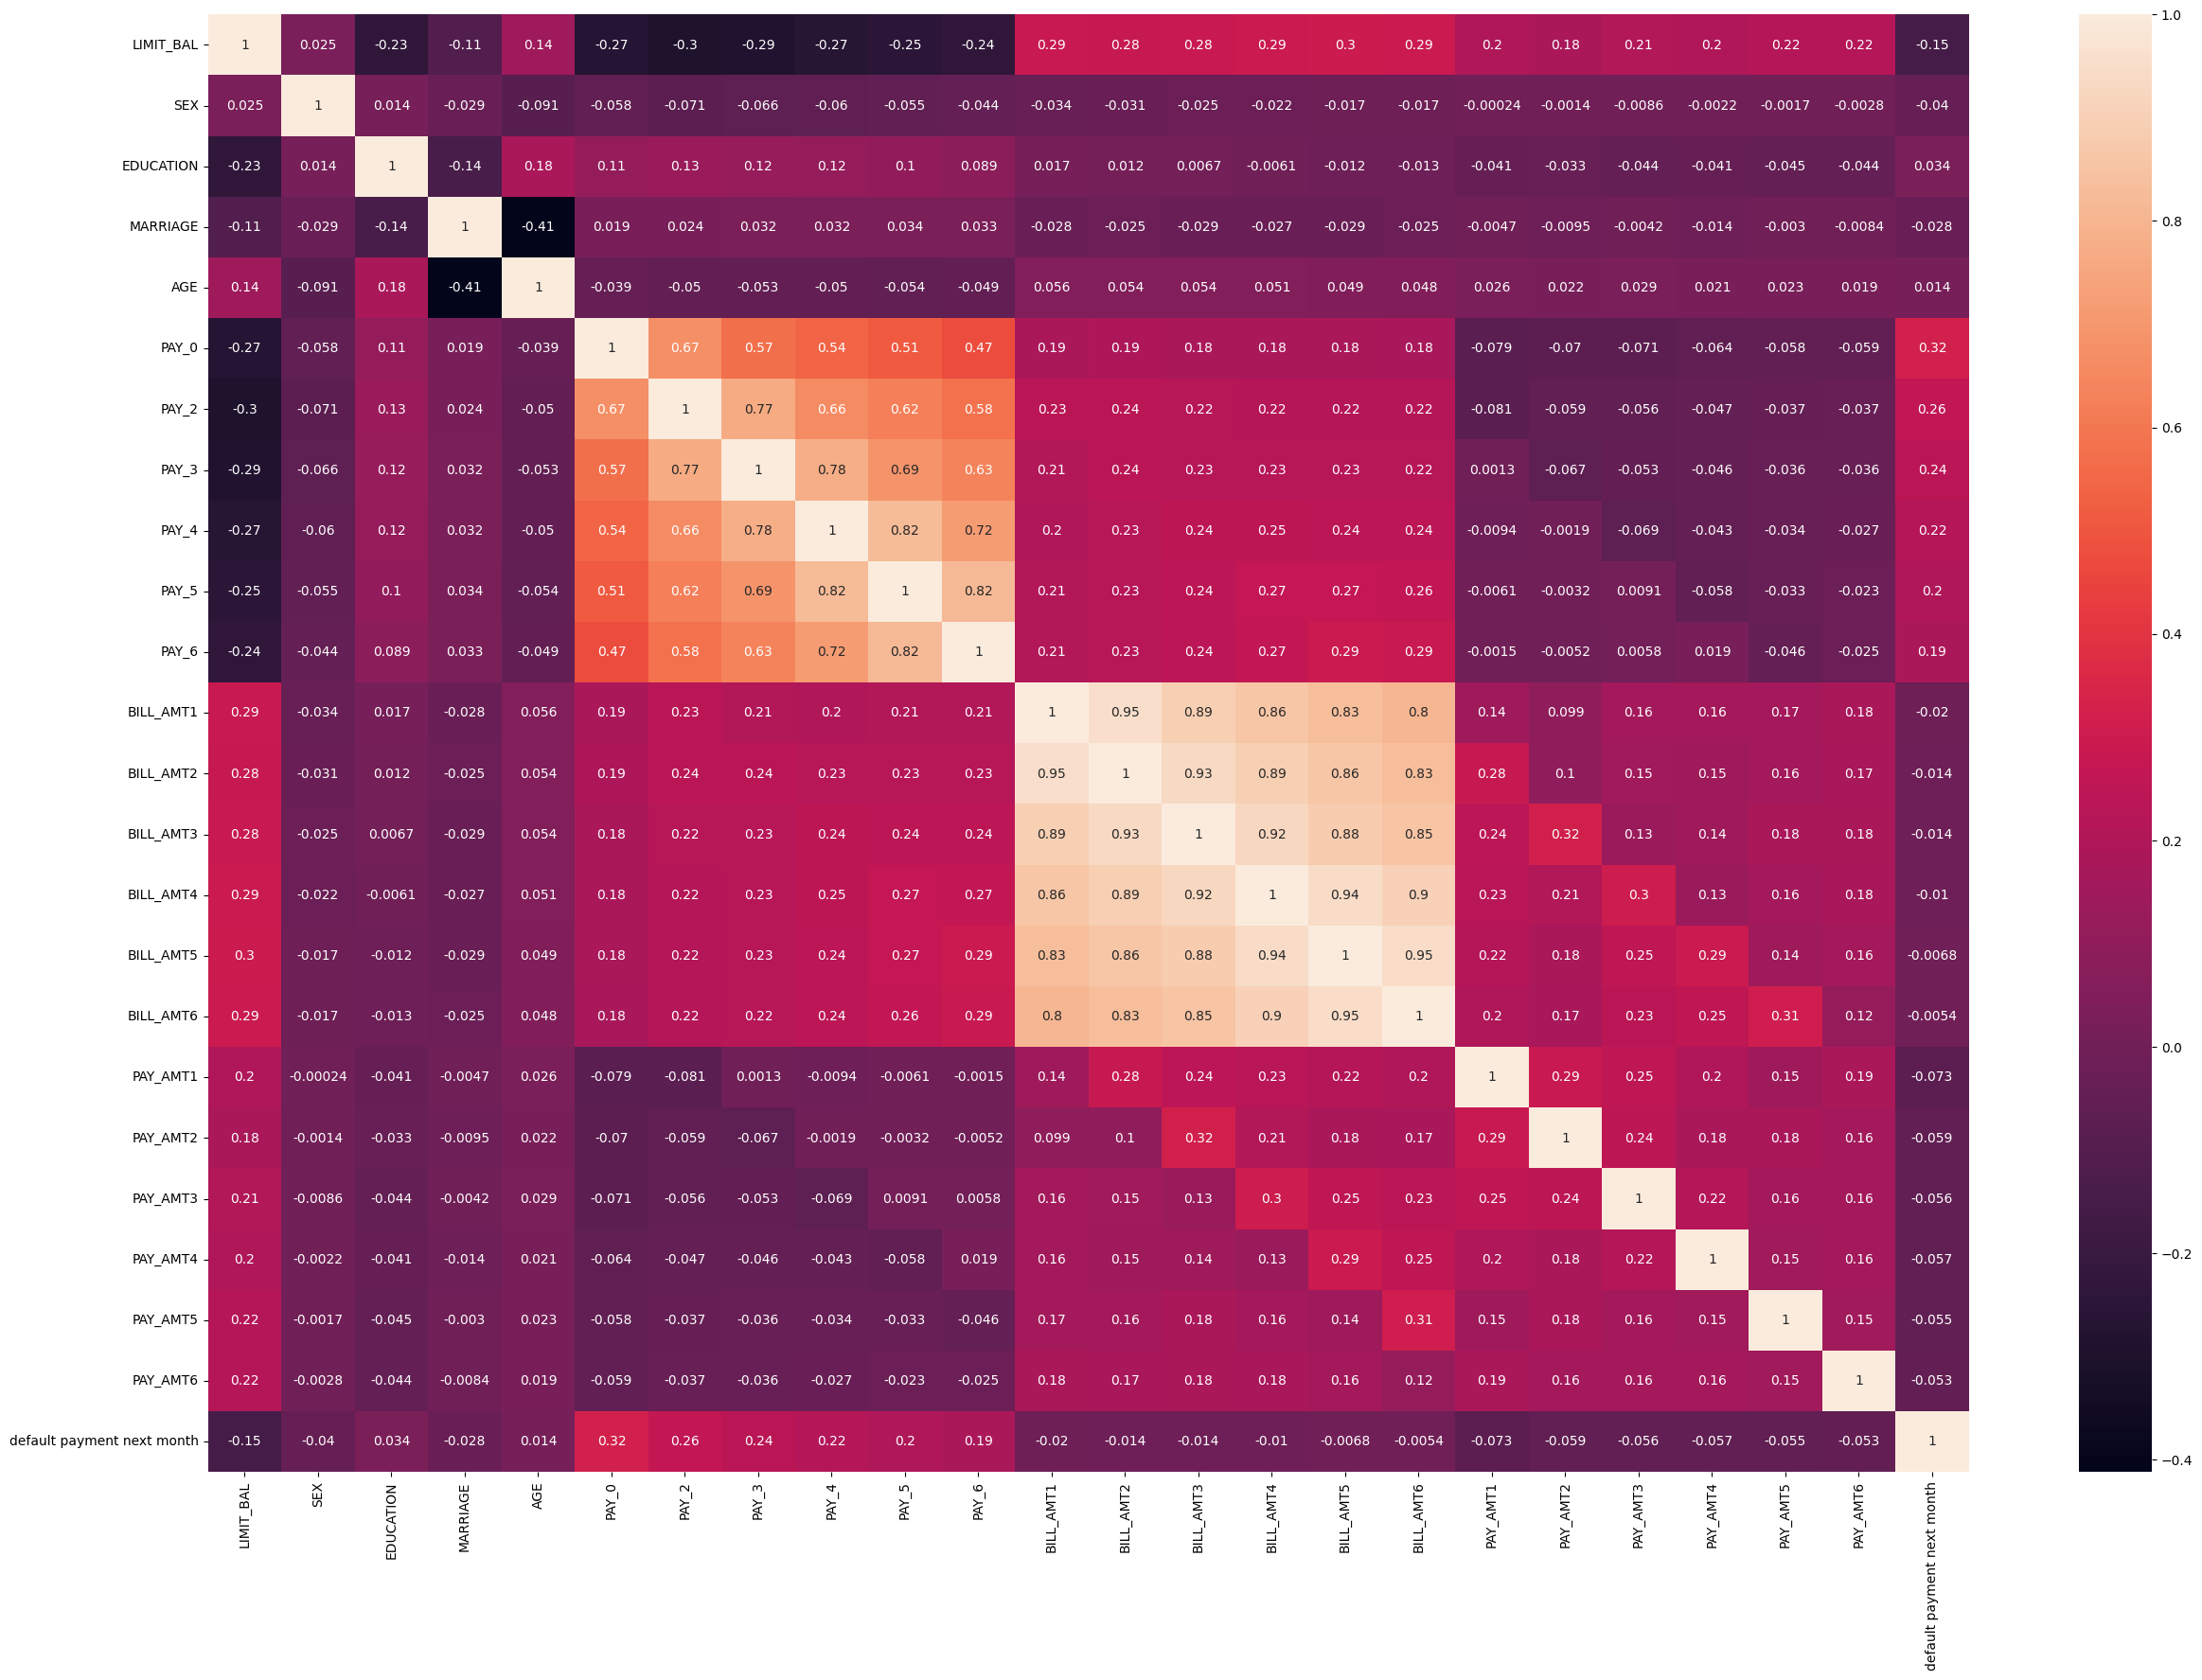

In [18]:
plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

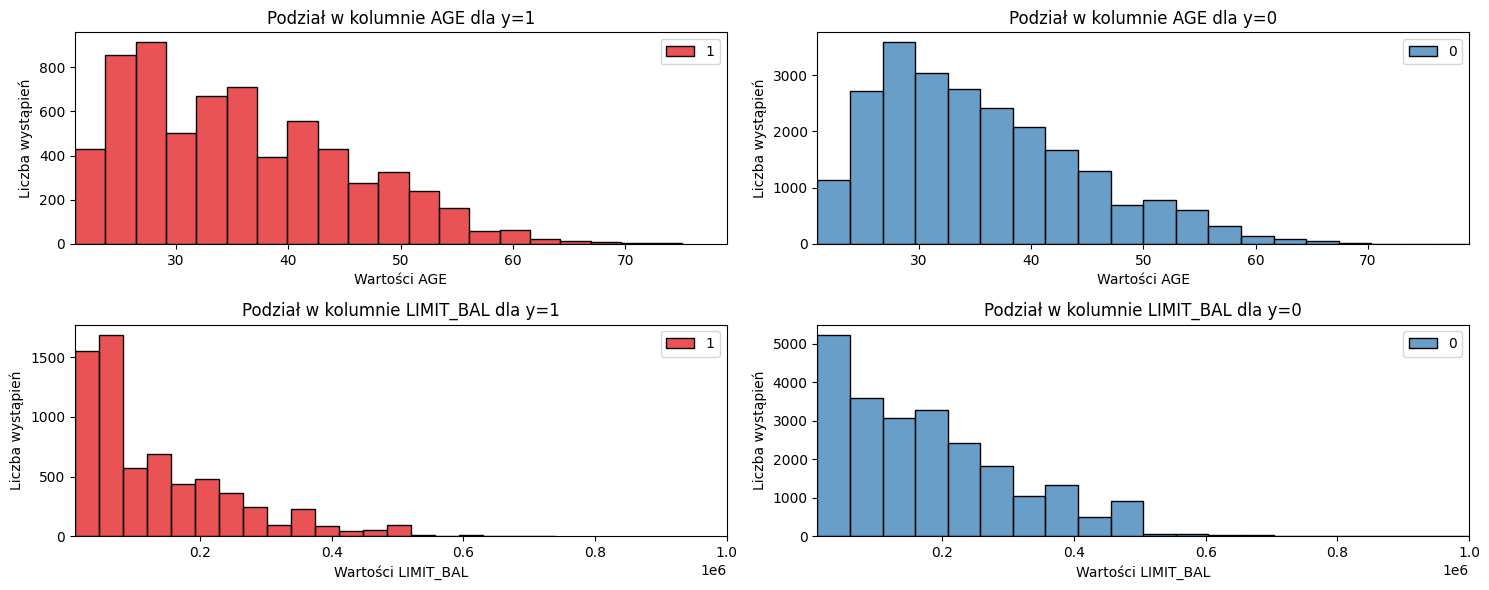

In [19]:
# Kolumny, które chcemy zbadać
columns_to_plot = ['AGE', 'LIMIT_BAL']

# Kolory i etykiety
colors = ['#377EB8', '#E41A1C']
labels = ['0', '1']

# Ustalanie zakresu dla osi x (sprawdzamy zakresy dla AGE i LIMIT_BAL)
age_min, age_max = df['AGE'].min(), df['AGE'].max()
limit_bal_min, limit_bal_max = df['LIMIT_BAL'].min(), df['LIMIT_BAL'].max()

# Tworzenie wykresów
plt.figure(figsize=(15, 6))

# Wykres dla kolumny 'AGE' dla y=1
plt.subplot(2, 2, 1)  # 2 wiersze, 2 kolumny, pierwszy wykres
sns.histplot(data=df[df['default payment next month'] == 1], x='AGE', bins=20, color=colors[1], label=labels[1])
plt.title('Podział w kolumnie AGE dla y=1')
plt.xlabel('Wartości AGE')
plt.ylabel('Liczba wystąpień')
plt.xlim(age_min, age_max)  # Ustawienie tego samego zakresu dla osi x
plt.legend()  # Dodanie legendy

# Wykres dla kolumny 'AGE' dla y=0
plt.subplot(2, 2, 2)  # 2 wiersze, 2 kolumny, drugi wykres
sns.histplot(data=df[df['default payment next month'] == 0], x='AGE', bins=20, color=colors[0], label=labels[0])
plt.title('Podział w kolumnie AGE dla y=0')
plt.xlabel('Wartości AGE')
plt.ylabel('Liczba wystąpień')
plt.xlim(age_min, age_max)  # Ustawienie tego samego zakresu dla osi x
plt.legend()  # Dodanie legendy

# Wykres dla kolumny 'LIMIT_BAL' dla y=1
plt.subplot(2, 2, 3)  # 2 wiersze, 2 kolumny, trzeci wykres
sns.histplot(data=df[df['default payment next month'] == 1], x='LIMIT_BAL', bins=20, color=colors[1], label=labels[1])
plt.title('Podział w kolumnie LIMIT_BAL dla y=1')
plt.xlabel('Wartości LIMIT_BAL')
plt.ylabel('Liczba wystąpień')
plt.xlim(limit_bal_min, limit_bal_max)  # Ustawienie tego samego zakresu dla osi x
plt.legend()  # Dodanie legendy

# Wykres dla kolumny 'LIMIT_BAL' dla y=0
plt.subplot(2, 2, 4)  # 2 wiersze, 2 kolumny, czwarty wykres
sns.histplot(data=df[df['default payment next month'] == 0], x='LIMIT_BAL', bins=20, color=colors[0], label=labels[0])
plt.title('Podział w kolumnie LIMIT_BAL dla y=0')
plt.xlabel('Wartości LIMIT_BAL')
plt.ylabel('Liczba wystąpień')
plt.xlim(limit_bal_min, limit_bal_max)  # Ustawienie tego samego zakresu dla osi x
plt.legend()  # Dodanie legendy

# Wyświetlenie wykresów
plt.tight_layout()  # Dopasowanie przestrzeni między wykresami
plt.show()

In [20]:
sns.set_palette(palette=['#E41A1C', '#377EB8'])

In [21]:
print(df.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


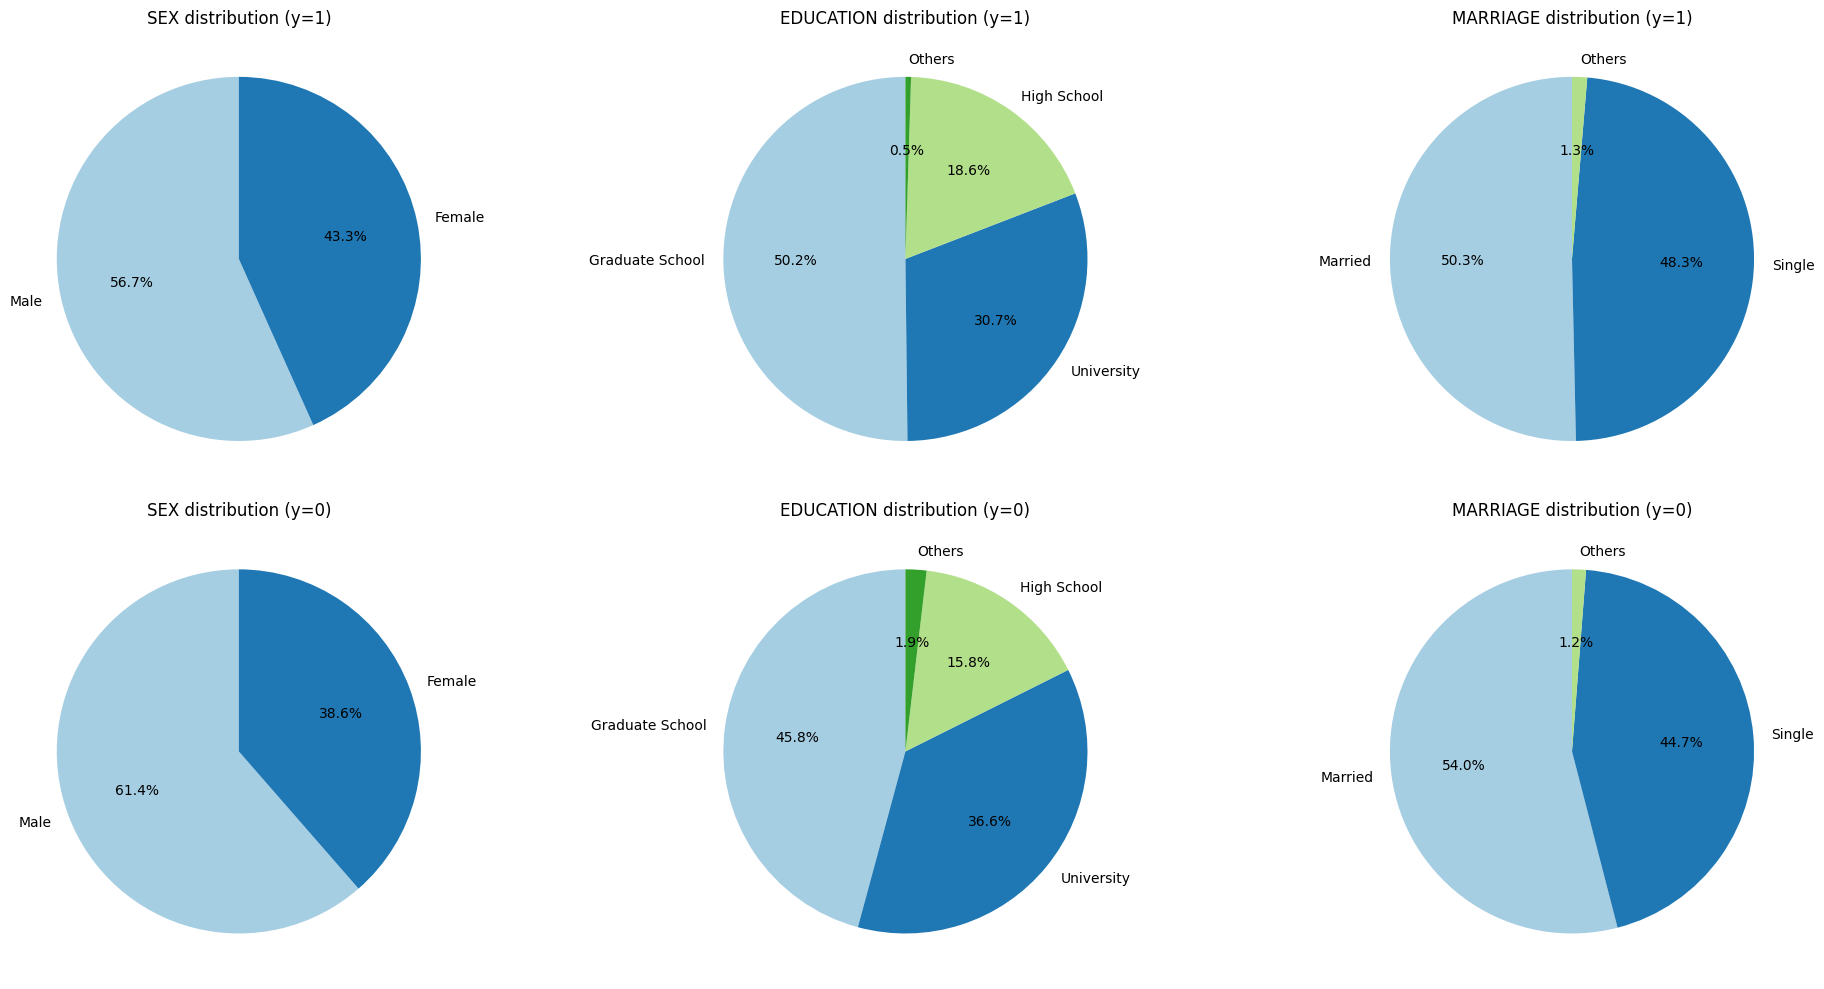

In [22]:
# Tworzenie danych pod wykresy
topics = ['SEX', 'EDUCATION', 'MARRIAGE']  # Możesz dodać więcej kategorii, jeśli istnieją
labels_dict = {
    'SEX': ['Male', 'Female'],
    'EDUCATION': ['Graduate School', 'University', 'High School', 'Others'],
    'MARRIAGE': ['Married', 'Single', 'Others']
}

# Tworzenie sublotów
fig, axs = plt.subplots(2, 3, figsize=(20, 10))  # 2 wiersze, 3 kolumny

for i, topic in enumerate(topics):
    # Filtracja danych dla y=1 i y=0
    data_y1 = df[df['default payment next month'] == 1][topic].value_counts()
    data_y0 = df[df['default payment next month'] == 0][topic].value_counts()
    
    # Przypisanie odpowiednich osi
    ax_y1 = axs[0, i]
    ax_y0 = axs[1, i]
    
    # Wykres kołowy dla y=1
    ax_y1.pie(data_y1, labels=labels_dict.get(topic, data_y1.index), autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    ax_y1.set_title(f'{topic} distribution (y=1)')
    
    # Wykres kołowy dla y=0
    ax_y0.pie(data_y0, labels=labels_dict.get(topic, data_y0.index), autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    ax_y0.set_title(f'{topic} distribution (y=0)')

# Dopasowanie przestrzeni
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()


In [23]:
df['PAY_0'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
Zamieniam -2 oraz -1 na 0.

In [24]:
df['PAY_0'].value_counts().sort_index()

PAY_0
-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: count, dtype: int64

In [25]:
#df.replace([-1, -2], 0, inplace=True)
df['PAY_0'] = df['PAY_0'].replace([-1, -2], 0)

In [26]:
df['PAY_0'].value_counts().sort_index()

PAY_0
0    23182
1     3688
2     2667
3      322
4       76
5       26
6       11
7        9
8       19
Name: count, dtype: int64

In [27]:
df['PAY_2'] = df['PAY_2'].replace([-1, -2], 0)
df['PAY_2'].unique()

array([2, 0, 3, 5, 7, 4, 1, 6, 8], dtype=int64)

In [28]:
df['PAY_3'] = df['PAY_3'].replace([-1, -2], 0)
df['PAY_3'].unique()

array([0, 2, 3, 4, 6, 7, 1, 5, 8], dtype=int64)

In [29]:
df['PAY_4'] = df['PAY_4'].replace([-1, -2], 0)
df['PAY_4'].unique()

array([0, 2, 3, 4, 5, 7, 6, 1, 8], dtype=int64)

In [30]:
df['PAY_5'] = df['PAY_5'].replace([-1, -2], 0)
df['PAY_5'].unique()

array([0, 2, 3, 5, 4, 7, 8, 6], dtype=int64)

In [31]:
df['PAY_6'] = df['PAY_6'].replace([-1, -2], 0)
df['PAY_6'].unique()

array([0, 2, 3, 6, 4, 7, 8, 5], dtype=int64)

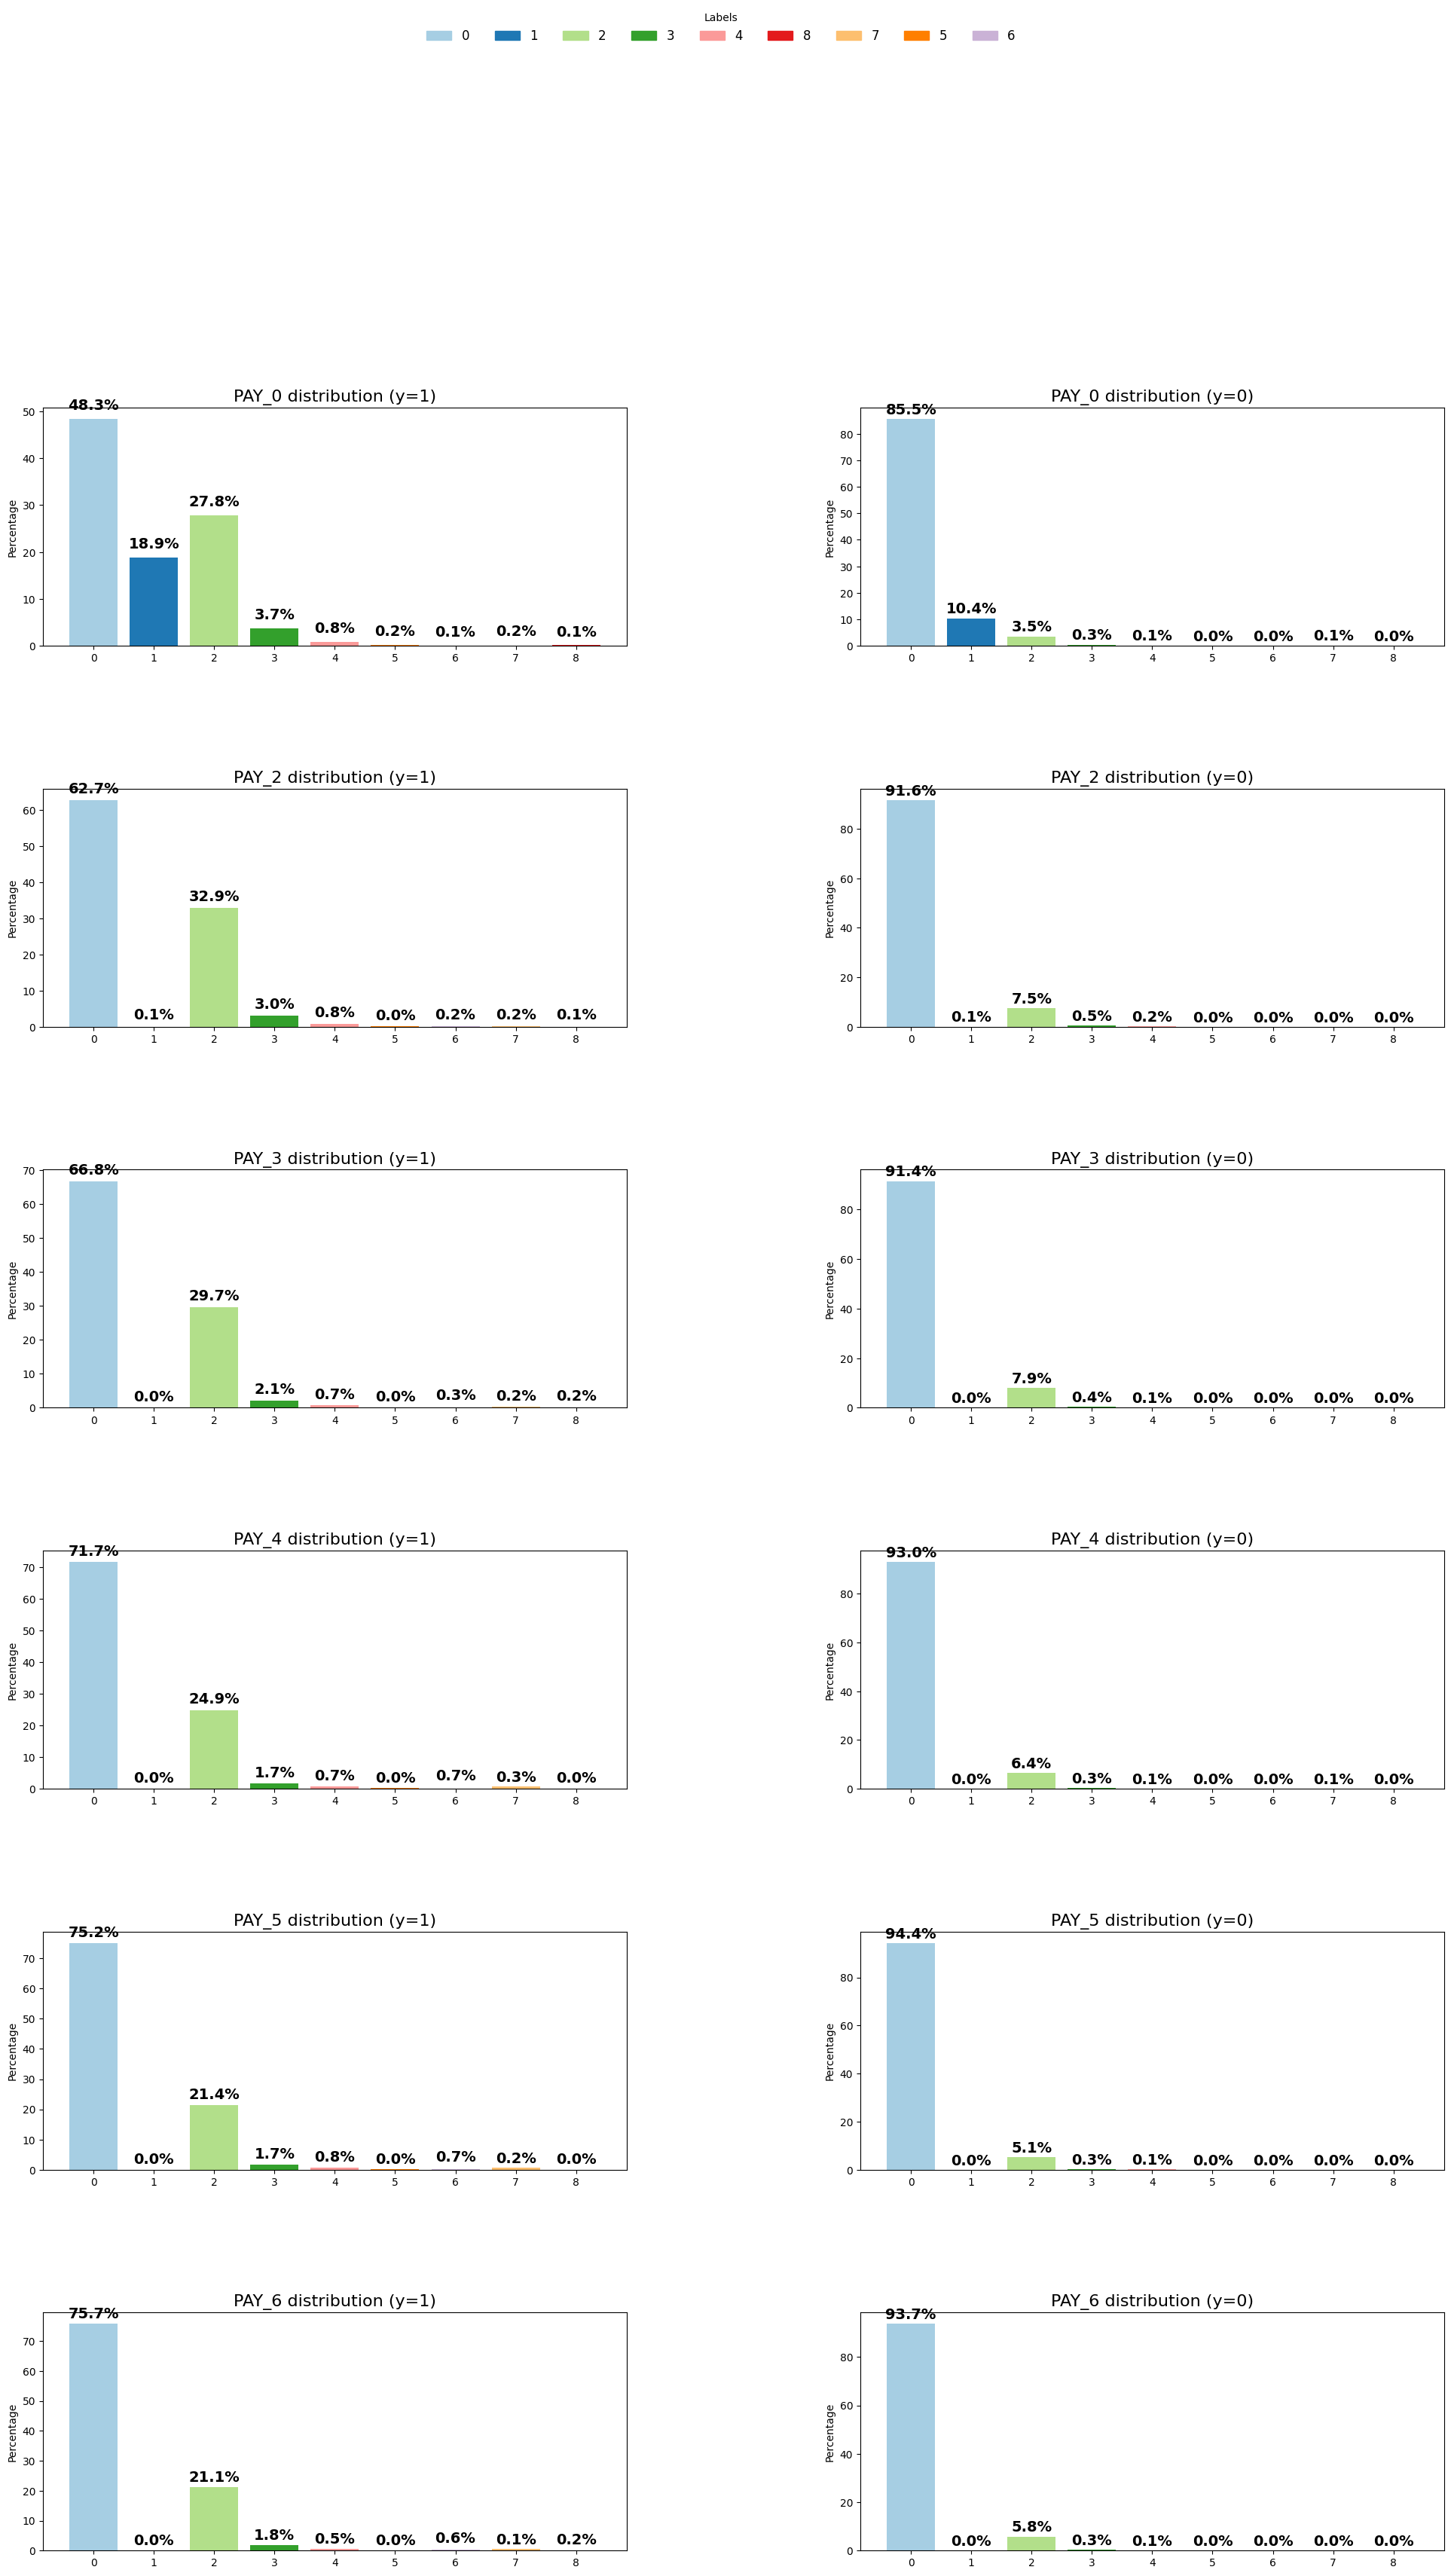

In [32]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch  # Dodano ten import

# Definicje wymaganych zmiennych
topics = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']  # Kategorie PAY
labels_order = [0, 1, 2, 3, 4, 8, 7, 5, 6]  # Kolejność etykiet
color_map = {value: color for value, color in zip(labels_order, plt.cm.Paired.colors[:len(labels_order)])}

# Tworzenie legendy
legend_labels = [str(label) for label in labels_order]
legend_colors = [color_map[label] for label in labels_order]
legend_patches = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Tworzenie subplotów z większym figsize (np. 24x36)
fig, axs = plt.subplots(6, 2, figsize=(24, 36))  # Zwiększ figsize
axs = axs.flatten()

for i, topic in enumerate(topics):
    # Obliczanie wartości procentowych
    data_y1 = df[df['default payment next month'] == 1][topic].value_counts(normalize=True) * 100
    data_y0 = df[df['default payment next month'] == 0][topic].value_counts(normalize=True) * 100

    # Dopasowanie kolejności i uzupełnienie braków
    data_y1 = data_y1.reindex(labels_order, fill_value=0)
    data_y0 = data_y0.reindex(labels_order, fill_value=0)

    # Wykres dla y=1
    axs[2 * i].bar(data_y1.index, data_y1, color=[color_map.get(label, "gray") for label in labels_order])
    axs[2 * i].set_title(f'{topic} distribution (y=1)', fontsize=16)
    axs[2 * i].set_xticks(labels_order)
    axs[2 * i].set_xticklabels(labels_order)
    axs[2 * i].set_ylabel('Percentage')

    # Dodanie wartości procentowych na słupkach
    for idx, val in enumerate(data_y1):
        axs[2 * i].text(idx, val + 2, f'{val:.1f}%', ha='center', fontsize=14, fontweight='bold')  # Większa czcionka

    # Wykres dla y=0
    axs[2 * i + 1].bar(data_y0.index, data_y0, color=[color_map.get(label, "gray") for label in labels_order])
    axs[2 * i + 1].set_title(f'{topic} distribution (y=0)', fontsize=16)
    axs[2 * i + 1].set_xticks(labels_order)
    axs[2 * i + 1].set_xticklabels(labels_order)
    axs[2 * i + 1].set_ylabel('Percentage')

    # Dodanie wartości procentowych na słupkach
    for idx, val in enumerate(data_y0):
        axs[2 * i + 1].text(idx, val + 2, f'{val:.1f}%', ha='center', fontsize=14, fontweight='bold')  # Większa czcionka

# Dodanie legendy na górze w poziomie
fig.legend(handles=legend_patches, loc='upper center', bbox_to_anchor=(0.5, 1.05),
           ncol=len(labels_order), title="Labels", frameon=False, fontsize=12)

# Dopasowanie odstępów między wykresami
plt.subplots_adjust(wspace=0.4, hspace=0.6, top=0.9)  # Większy odstęp dla legendy

# Wyświetlenie wykresów
plt.show()


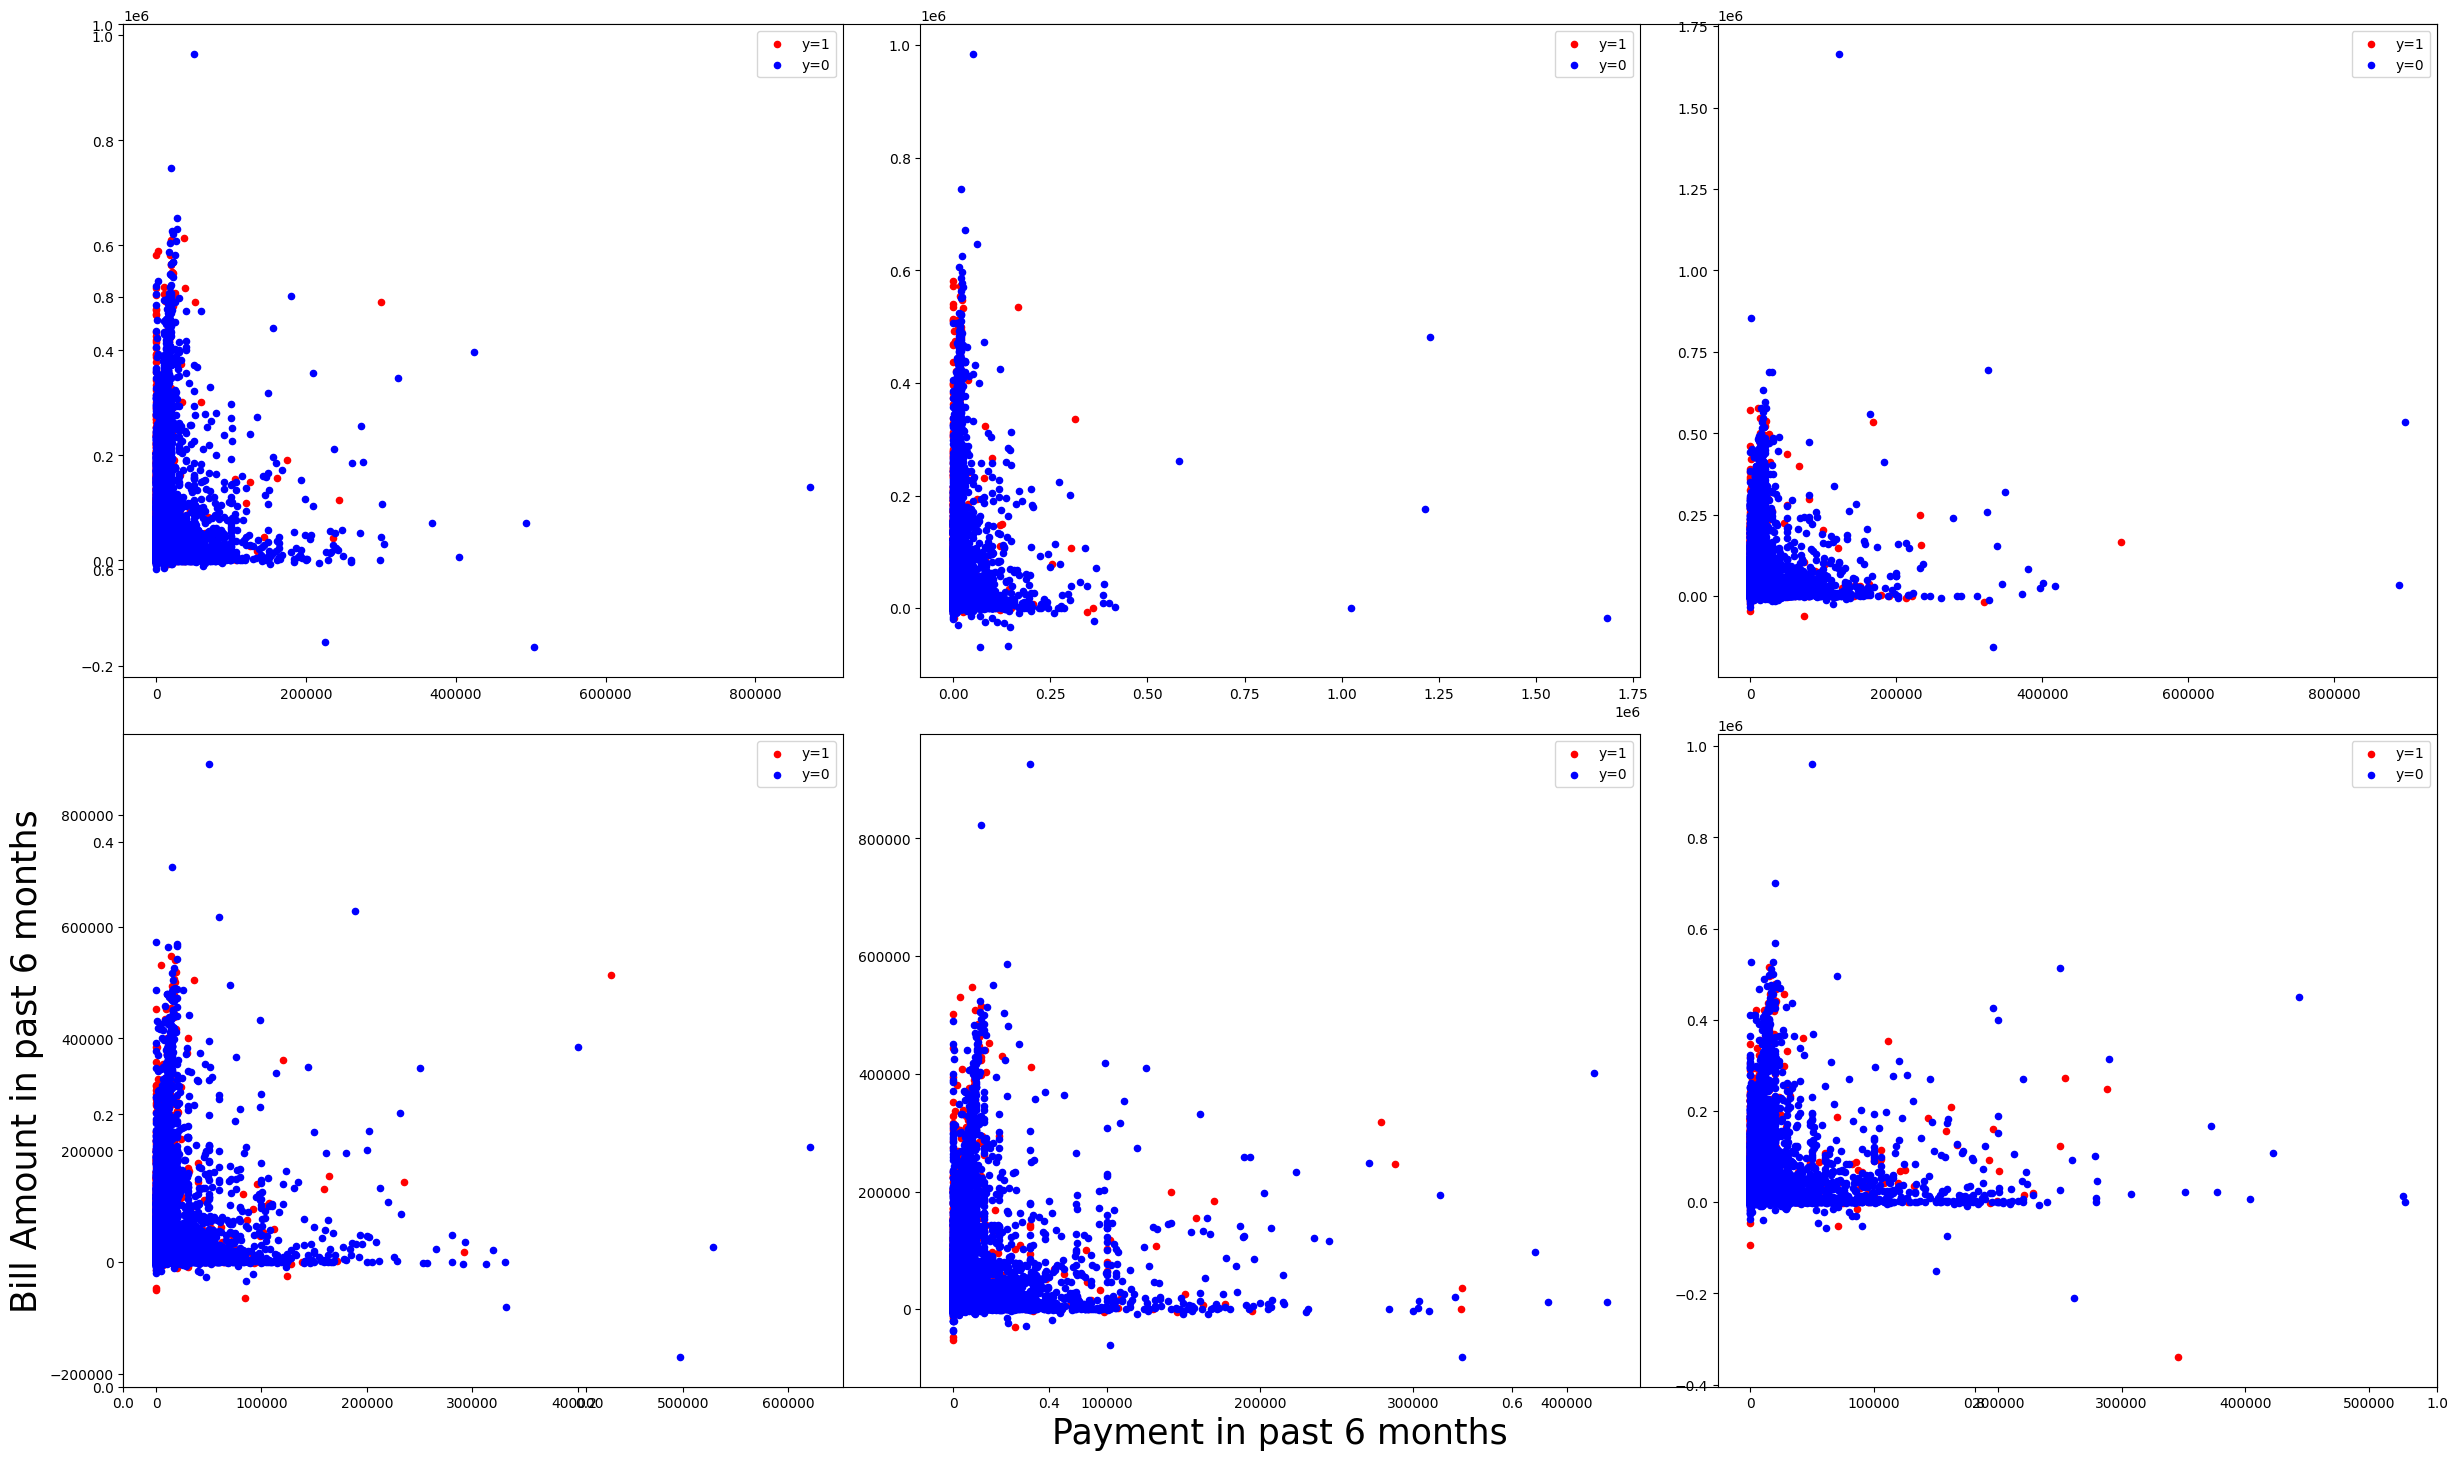

In [33]:
import matplotlib.pyplot as plt

# Tworzymy podziały na dwie grupy: y=1 i y=0
df_y1 = df[df['default payment next month'] == 1]
df_y0 = df[df['default payment next month'] == 0]

# Tworzymy subplots z większym rozmiarem
plt.subplots(figsize=(25,15))  # Większy rozmiar wykresów

# Pierwszy wykres
plt.subplot(231)
plt.scatter(x=df_y1.PAY_AMT1, y=df_y1.BILL_AMT1, c='r', s=20, label='y=1')  
plt.scatter(x=df_y0.PAY_AMT1, y=df_y0.BILL_AMT1, c='b', s=20, label='y=0') 
plt.legend()

# Drugi wykres
plt.subplot(232)
plt.scatter(x=df_y1.PAY_AMT2, y=df_y1.BILL_AMT2, c='r', s=20, label='y=1') 
plt.scatter(x=df_y0.PAY_AMT2, y=df_y0.BILL_AMT2, c='b', s=20, label='y=0') 
plt.legend()

# Trzeci wykres
plt.subplot(233)
plt.scatter(x=df_y1.PAY_AMT3, y=df_y1.BILL_AMT3, c='r', s=20, label='y=1') 
plt.scatter(x=df_y0.PAY_AMT3, y=df_y0.BILL_AMT3, c='b', s=20, label='y=0')  
plt.legend()

# Czwarty wykres
plt.subplot(234)
plt.scatter(x=df_y1.PAY_AMT4, y=df_y1.BILL_AMT4, c='r', s=20, label='y=1')  
plt.scatter(x=df_y0.PAY_AMT4, y=df_y0.BILL_AMT4, c='b', s=20, label='y=0') 
plt.ylabel("Bill Amount in past 6 months", fontsize=25)
plt.legend()

# Piąty wykres
plt.subplot(235)
plt.scatter(x=df_y1.PAY_AMT5, y=df_y1.BILL_AMT5, c='r', s=20, label='y=1') 
plt.scatter(x=df_y0.PAY_AMT5, y=df_y0.BILL_AMT5, c='b', s=20, label='y=0')  
plt.xlabel("Payment in past 6 months", fontsize=25)
plt.legend()

# Szósty wykres
plt.subplot(236)
plt.scatter(x=df_y1.PAY_AMT6, y=df_y1.BILL_AMT6, c='r', s=20, label='y=1')  
plt.scatter(x=df_y0.PAY_AMT6, y=df_y0.BILL_AMT6, c='b', s=20, label='y=0')  
plt.legend()

# Dopasowanie przestrzeni
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()


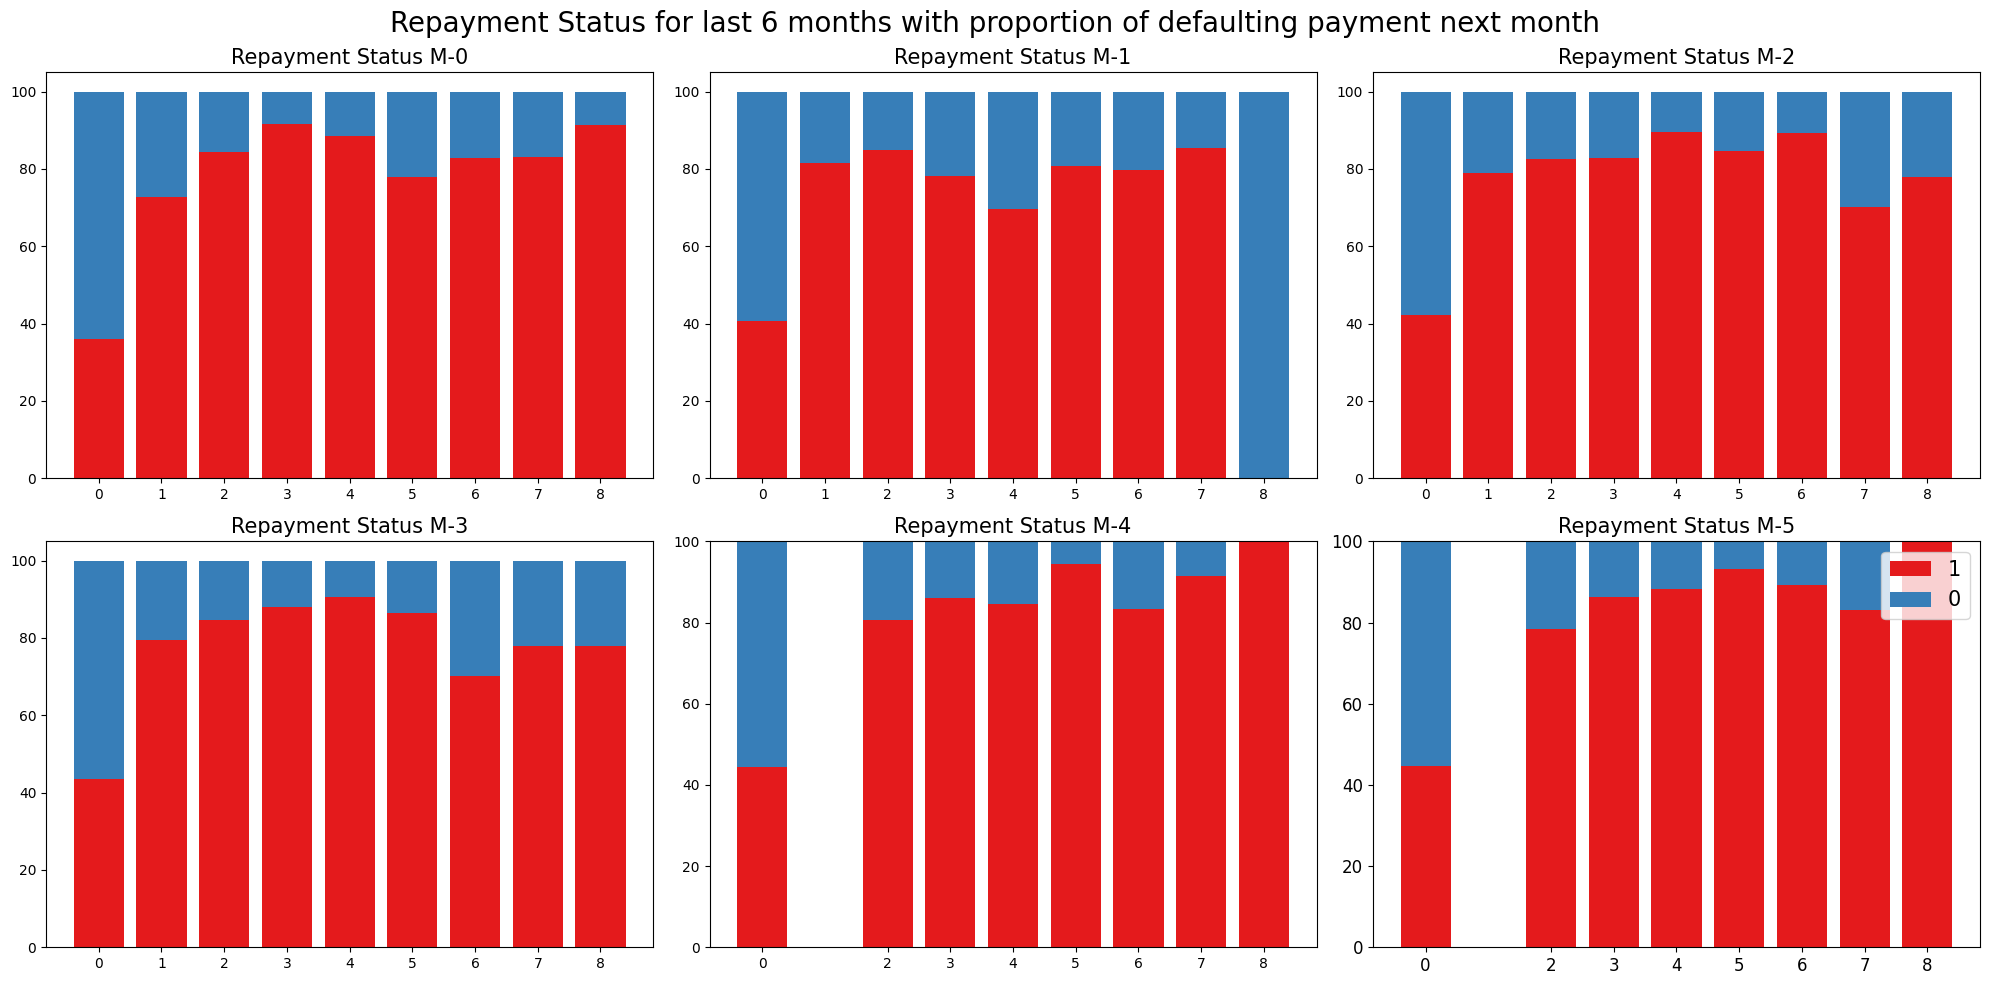

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Funkcja do obliczania proporcji dla 0 i 1
def plot_repayment_status(df, col, ax, title):
    ind = sorted(df[col].unique())  # Unikalne wartości w kolumnie
    pay_0 = df[col][df['default payment next month'] == 0].value_counts(normalize=True)
    pay_1 = df[col][df['default payment next month'] == 1].value_counts(normalize=True)
    
    # Uzupełnianie brakujących wartości dla 0 i 1
    for i in pay_0.index:
        if i not in pay_1.index:
            pay_1[i] = 0
    for i in pay_1.index:
        if i not in pay_0.index:
            pay_0[i] = 0
            
    total = pay_0.values + pay_1.values
    pay_0_prop = np.true_divide(pay_0, total) * 100
    pay_1_prop = np.true_divide(pay_1, total) * 100
    
    # Zmiana kolejności słupków: pay_1 na dole, pay_0 na górze
    ax.bar(ind, pay_1_prop, label='1')  # Teraz 1 jest na dole
    ax.bar(ind, pay_0_prop, bottom=pay_1_prop, label='0')  # Teraz 0 jest na górze
    ax.set_title(title, fontsize=15)
    ax.set_xticks(ind)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
# Tworzenie wykresów
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Listy kolumn i tytułów dla wykresów
columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
titles = [
    "Repayment Status M-0", "Repayment Status M-1", "Repayment Status M-2",
    "Repayment Status M-3", "Repayment Status M-4", "Repayment Status M-5"
]

# Pętla po kolumnach i tworzenie wykresów
for i, col in enumerate(columns):
    row, col_idx = divmod(i, 3)  # Wiersz i kolumna w siatce subplots
    plot_repayment_status(df, col, axs[row, col_idx], titles[i])

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)

plt.tight_layout()
plt.show()


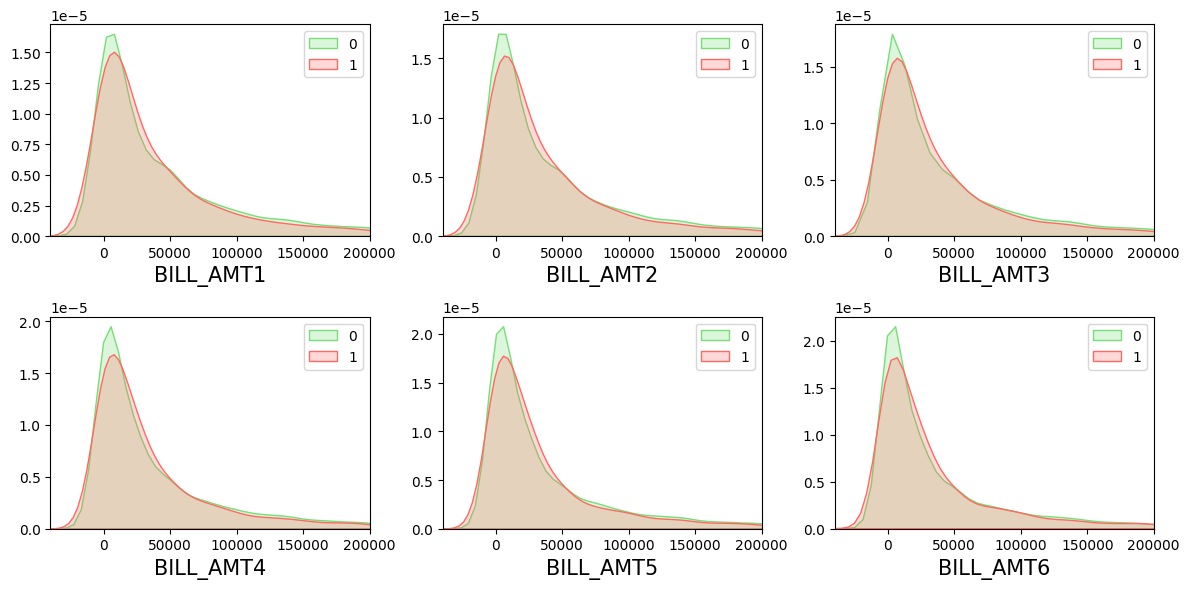

In [35]:
BILL_AMT_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(12, 6))

for i, col in enumerate(BILL_AMT_cols):    
    plt.subplot(2, 3, i + 1)    
    sns.kdeplot(
        df.loc[df['default payment next month'] == 0, col],
        label='0',
        color='#77DD76',
        fill=True  # Zastępuje parametr shade=True
    )
    sns.kdeplot(
        df.loc[df['default payment next month'] == 1, col],
        label='1',
        color='#FF6962',
        fill=True  # Zastępuje parametr shade=True
    )
    plt.xlim(-40000, 200000)
    plt.ylabel('')
    plt.xlabel(col, fontsize=15)
    plt.legend()
    plt.tight_layout()

plt.show()


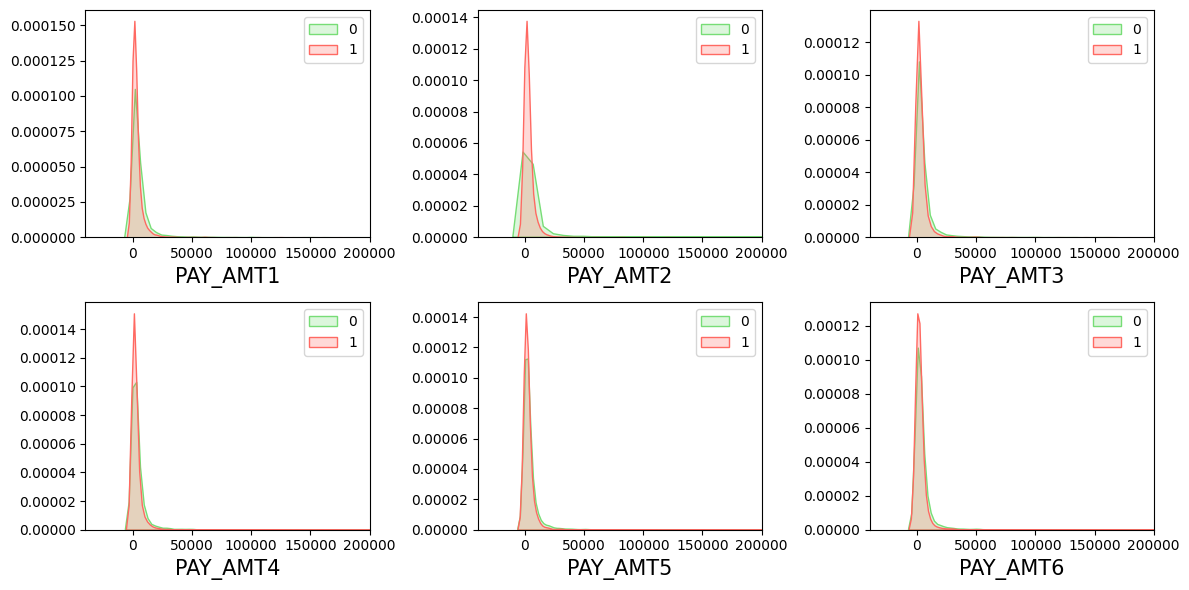

In [36]:
PAY_AMT_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(12, 6))

for i, col in enumerate(PAY_AMT_cols):    
    plt.subplot(2, 3, i + 1)    
    sns.kdeplot(
        df.loc[df['default payment next month'] == 0, col],
        label='0',
        color='#77DD76',
        fill=True  # Zastępuje parametr shade=True
    )
    sns.kdeplot(
        df.loc[df['default payment next month'] == 1, col],
        label='1',
        color='#FF6962',
        fill=True  # Zastępuje parametr shade=True
    )
    plt.xlim(-40000, 200000)
    plt.ylabel('')
    plt.xlabel(col, fontsize=15)
    plt.legend()
    plt.tight_layout()

plt.show()


In [37]:
df1= df.copy()


In [38]:
X = df1.drop('default payment next month',axis=1)
Y = df1['default payment next month']

In [39]:
# import pandas as pd
from scipy import stats

corr_dict = {}
for col in X.columns:
    corr_dict[col] = stats.pointbiserialr(X[col], Y)[0]

# Wyświetlanie posortowanych wartości korelacji
pd.Series(corr_dict).sort_values(ascending=False)

PAY_0        0.396019
PAY_2        0.327093
PAY_3        0.286999
PAY_4        0.269055
PAY_5        0.260850
PAY_6        0.244437
EDUCATION    0.033842
AGE          0.013890
BILL_AMT6   -0.005372
BILL_AMT5   -0.006760
BILL_AMT4   -0.010156
BILL_AMT3   -0.014076
BILL_AMT2   -0.014193
BILL_AMT1   -0.019644
MARRIAGE    -0.027575
SEX         -0.039961
PAY_AMT6    -0.053183
PAY_AMT5    -0.055124
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT2    -0.058579
PAY_AMT1    -0.072929
LIMIT_BAL   -0.153520
dtype: float64

**wybór cech: PAY_0, PAY_2, PAY_5, PAY_6, LIMIT_BAL, PAY_AMT1**

In [ ]:
trenowanie modeli

In [40]:
features = ['PAY_0', 'PAY_2', 'PAY_5', 'PAY_6', 'LIMIT_BAL', 'PAY_AMT1']
target = 'default payment next month'

In [41]:
X, y = df[features], df[target]

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['PAY_0', 'PAY_2', 'PAY_5', 'PAY_6', 'LIMIT_BAL', 'PAY_AMT1']], y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 21000
Testowe obserwacje: 9000


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression()

In [44]:
predictions_lr = model_lr.predict(X_test_standardized)

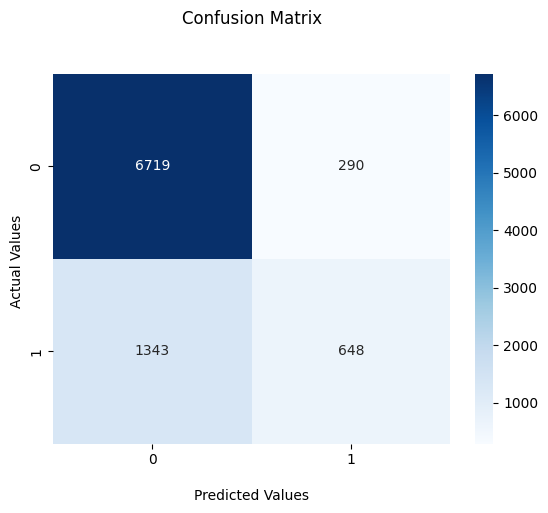

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_test, predictions_lr))
print("Precision:", precision_score(y_test, predictions_lr))
print("Recall:", recall_score(y_test, predictions_lr))
print("F1_score:", f1_score(y_test, predictions_lr))

Accuracy:  0.8185555555555556
Precision: 0.6908315565031983
Recall: 0.32546459065796085
F1_score: 0.4424718333902356


In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7009
           1       0.69      0.33      0.44      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



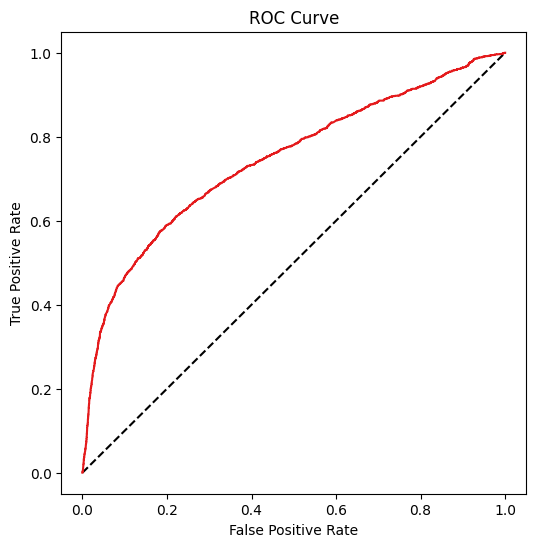

AUC: 0.7438009493283336


In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# prognoza prawdopodobieństwa
predictions_probability_lr = model_lr.predict_proba(X_test_standardized)

# obliczenie FPR oraz TPR w zależności od punktu odcięcia
fpr, tpr, thresholds = roc_curve(y_test, predictions_probability_lr[:,1])

# wizualizacja ROC Curve
fig = plt.figure(figsize=(6, 6))

# rysowanie prostej dla modelu losowego
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# obliczenie AUC
auc = roc_auc_score(y_test, predictions_probability_lr[:,1])
print('AUC: ' + str(auc))

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, f1_score, roc_auc_score, accuracy_score, precision_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Inicjalizacja metryk
metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC', 'Accuracy', 'Precision'])
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:, 1])

    # Wyświetlenie raportu klasyfikacji
    print(classification_report(y_checked, predictions))

    # Macierz konfuzji
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # Wykres ROC
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Obliczanie metryk
    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:, 1])
    accuracy_metric = accuracy_score(y_checked, predictions)
    precision_metric = precision_score(y_checked, predictions)

    # Dodanie metryk do DataFrame
    new_row = pd.DataFrame({'Model': [name], 
                            'F1_score': [f1_metric], 
                            'AUC': [auc_metric], 
                            'Accuracy': [accuracy_metric], 
                            'Precision': [precision_metric]})
    metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)
    return metrics_dataframe


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7009
           1       0.69      0.33      0.44      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



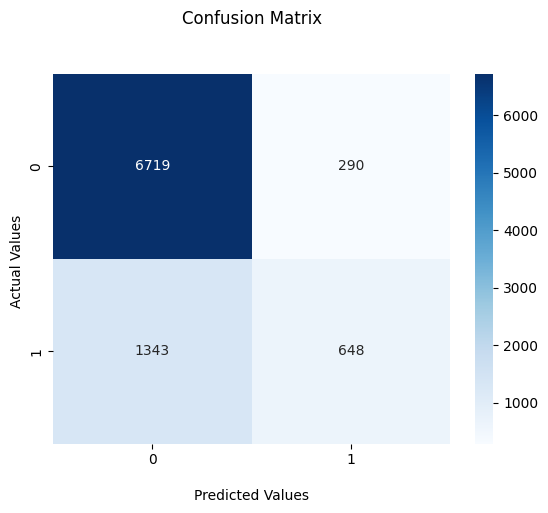

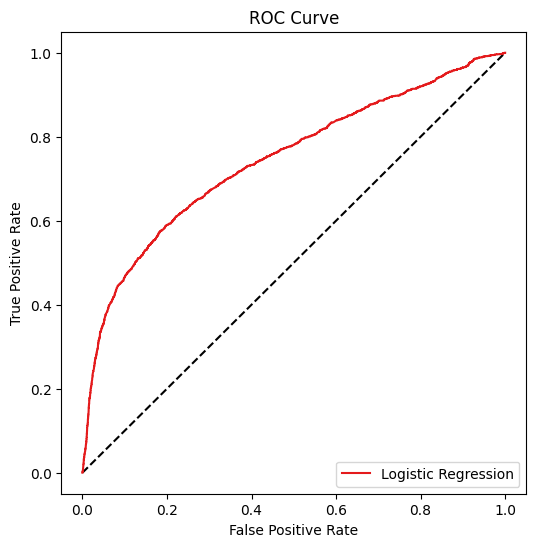

C:\Users\Kasia\AppData\Local\Temp\ipykernel_12208\45181644.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)


,Model,F1_score,AUC,Accuracy,Precision
0,Logistic Regression,0.442472,0.743801,0.818556,0.690832


In [50]:
calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors= 1)
model_knn.fit(X_train_standardized, y_train)


KNeighborsClassifier(n_neighbors=1)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7009
           1       0.40      0.40      0.40      1991

    accuracy                           0.74      9000
   macro avg       0.61      0.61      0.61      9000
weighted avg       0.73      0.74      0.73      9000



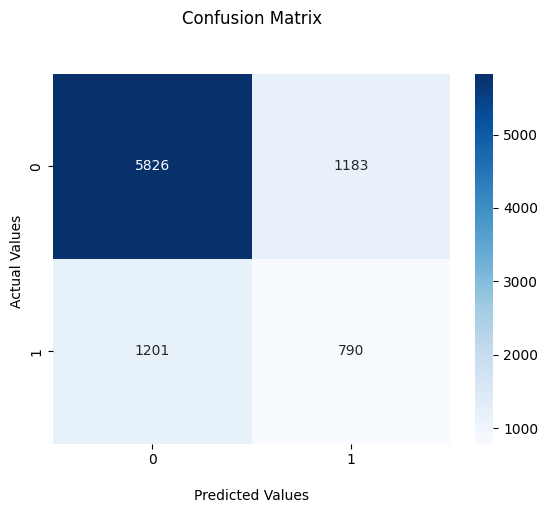

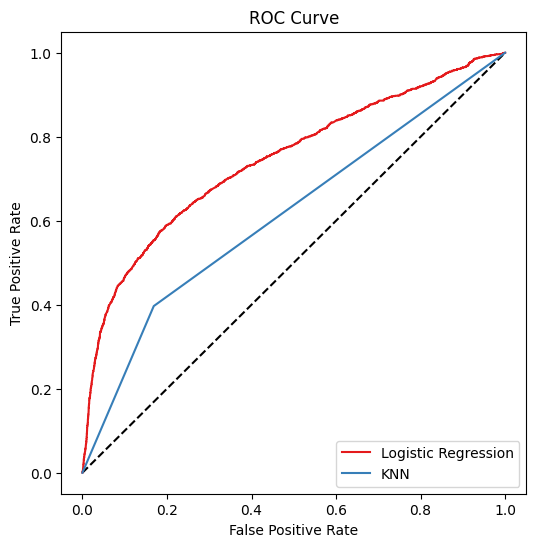

,Model,F1_score,AUC,Accuracy,Precision
0,Logistic Regression,0.442472,0.743801,0.818556,0.690832
1,KNN,0.398587,0.614001,0.735111,0.400405


In [52]:
calculate_metrics(model_knn, 'KNN', X_test_standardized, y_test)

In [53]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.37      0.48      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.80      0.82      0.80      9000



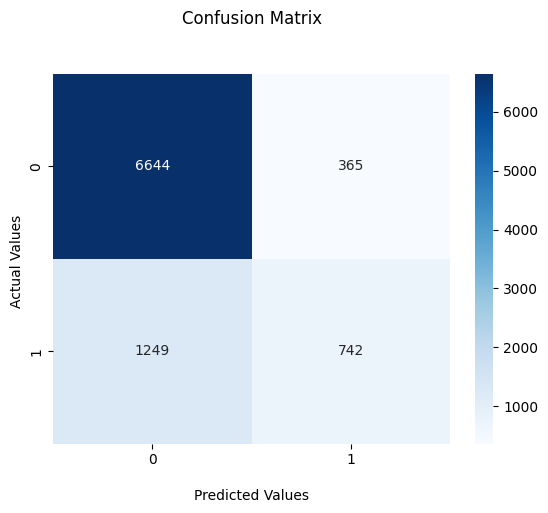

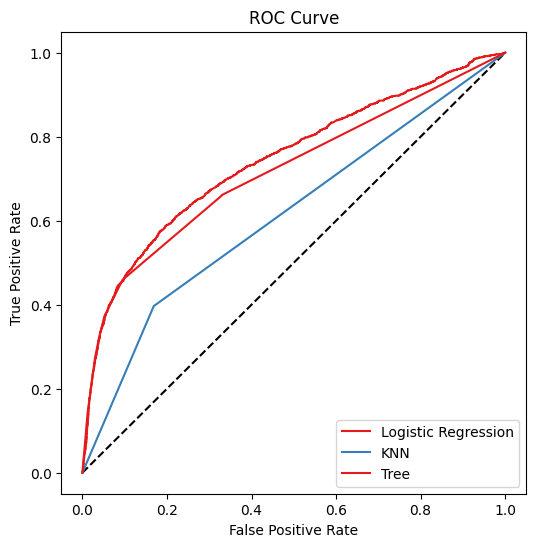

,Model,F1_score,AUC,Accuracy,Precision
0,Logistic Regression,0.442472,0.743801,0.818556,0.690832
1,KNN,0.398587,0.614001,0.735111,0.400405
2,Tree,0.479019,0.717687,0.820667,0.670280


In [54]:
calculate_metrics(model_tree, 'Tree', X_test, y_test)

In [55]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=1000, max_depth=3, min_samples_leaf=5)
model_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=1000)

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7009
           1       0.69      0.35      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.81      0.82      0.80      9000



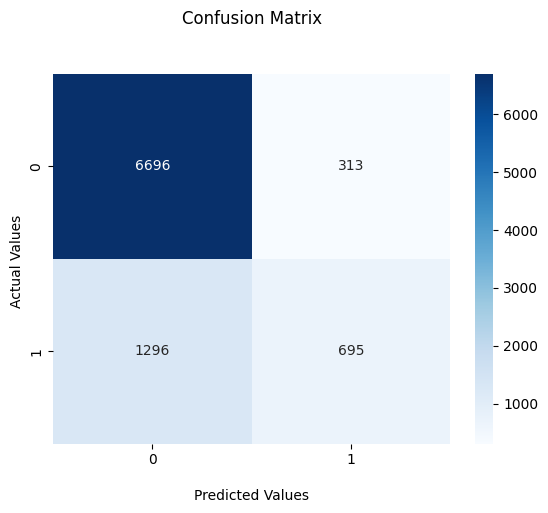

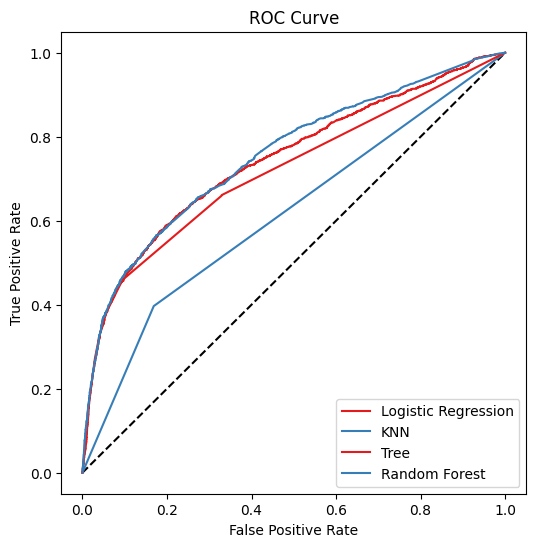

,Model,F1_score,AUC,Accuracy,Precision
0,Logistic Regression,0.442472,0.743801,0.818556,0.690832
1,KNN,0.398587,0.614001,0.735111,0.400405
2,Tree,0.479019,0.717687,0.820667,0.670280
3,Random Forest,0.463488,0.754142,0.821222,0.689484


In [56]:
calculate_metrics(model_forest, 'Random Forest', X_test, y_test)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from numpy import arange, meshgrid, hstack, where

# Trenowanie modeli
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

model_l1 = LogisticRegression(penalty='l1', C=0.01, solver='saga', max_iter=1000)
model_l1.fit(X_train_standardized, y_train)

model_l2 = LogisticRegression(penalty='l2', C=0.001, solver='lbfgs', max_iter=1000)
model_l2.fit(X_train_standardized, y_train)

model_elasticnet = LogisticRegression(penalty='elasticnet', C=100, solver='saga', l1_ratio=0.5, max_iter=1000)
model_elasticnet.fit(X_train_standardized, y_train)


LogisticRegression(C=100, l1_ratio=0.5, max_iter=1000, penalty='elasticnet',
                   solver='saga')

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7009
           1       0.69      0.33      0.44      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



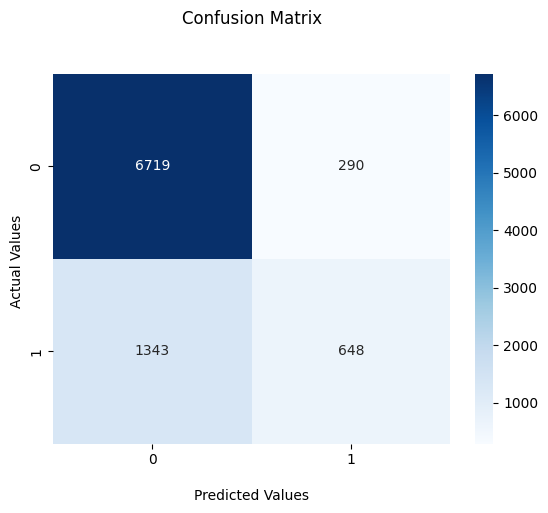

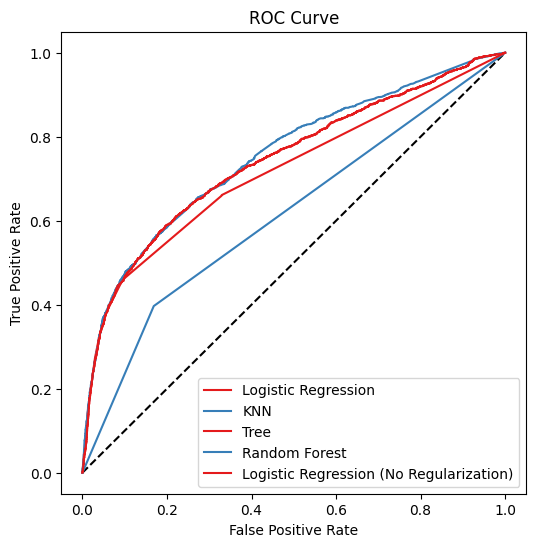

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7009
           1       0.69      0.32      0.44      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



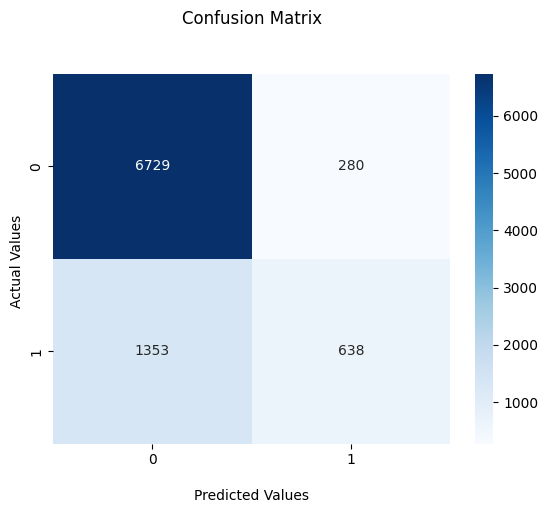

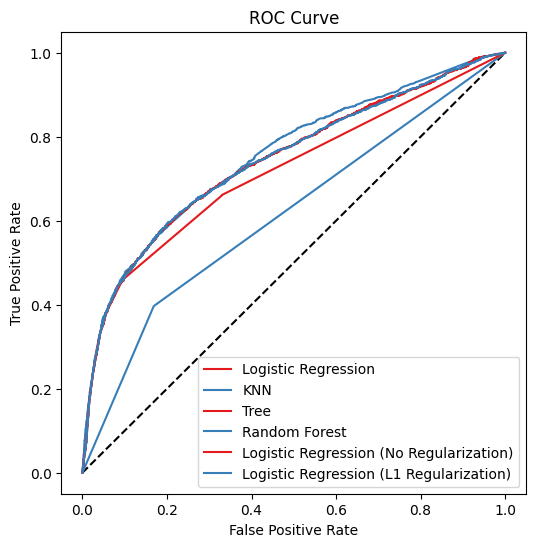

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.71      0.27      0.39      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.62      0.64      9000
weighted avg       0.80      0.81      0.78      9000



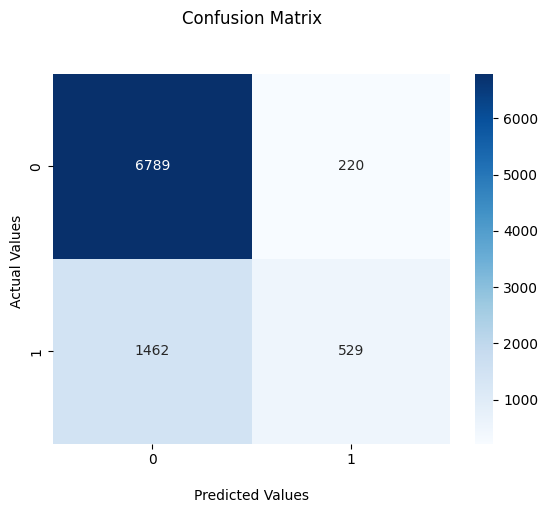

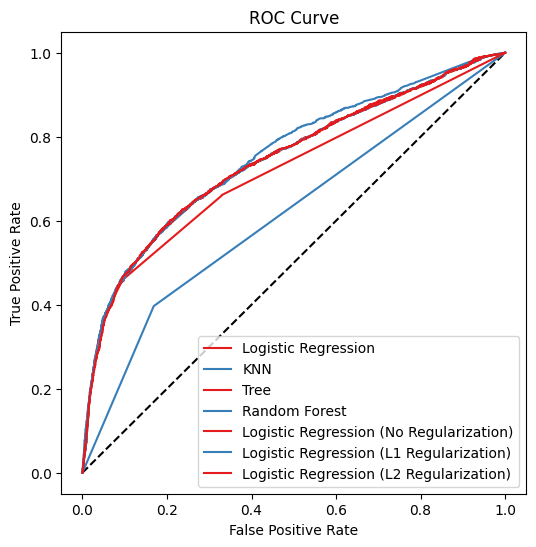

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7009
           1       0.69      0.33      0.44      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



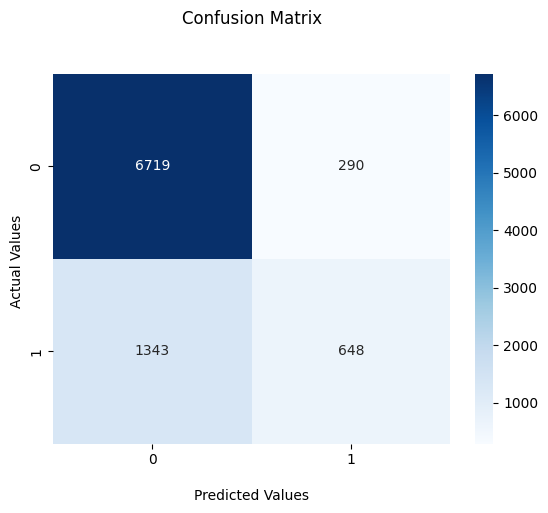

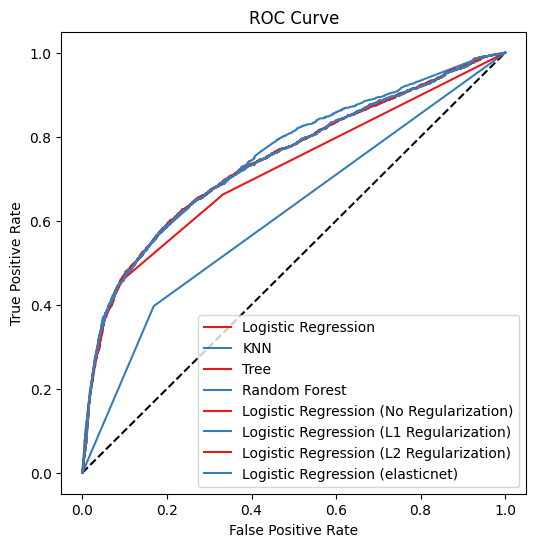

                                     Model  F1_score       AUC  Accuracy  \
0                      Logistic Regression  0.442472  0.743801  0.818556   
1                                      KNN  0.398587  0.614001  0.735111   
2                                     Tree  0.479019  0.717687  0.820667   
3                            Random Forest  0.463488  0.754142  0.821222   
4  Logistic Regression (No Regularization)  0.442472  0.743801  0.818556   
5  Logistic Regression (L1 Regularization)  0.438639  0.743674  0.818556   
6  Logistic Regression (L2 Regularization)  0.386131  0.743608  0.813111   
7         Logistic Regression (elasticnet)  0.442472  0.743799  0.818556   

   Precision  
0   0.690832  
1   0.400405  
2   0.670280  
3   0.689484  
4   0.690832  
5   0.694989  
6   0.706275  
7   0.690832  


In [58]:
# Wywołanie funkcji calculate_metrics dla każdego modelu
metrics_dataframe = calculate_metrics(model_lr, 'Logistic Regression (No Regularization)', X_test_standardized, y_test)
metrics_dataframe = calculate_metrics(model_l1, 'Logistic Regression (L1 Regularization)', X_test_standardized, y_test)
metrics_dataframe = calculate_metrics(model_l2, 'Logistic Regression (L2 Regularization)', X_test_standardized, y_test)
metrics_dataframe = calculate_metrics(model_elasticnet, 'Logistic Regression (elasticnet)', X_test_standardized, y_test)

# Wyświetlenie zbioru wyników
print(metrics_dataframe)

In [59]:
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 5, 'min_samples_leaf': 3}


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.68      0.36      0.47      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.81      0.82      0.80      9000



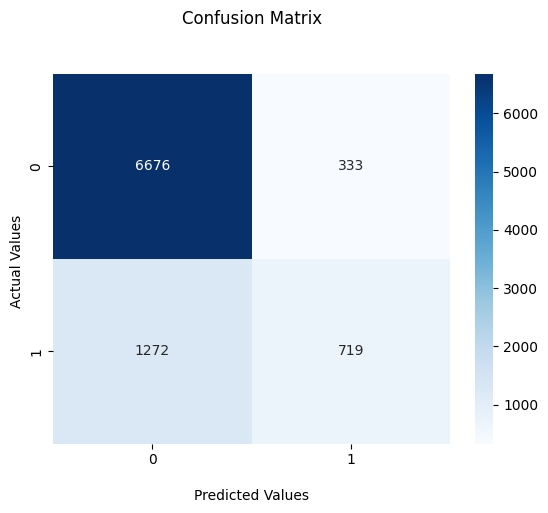

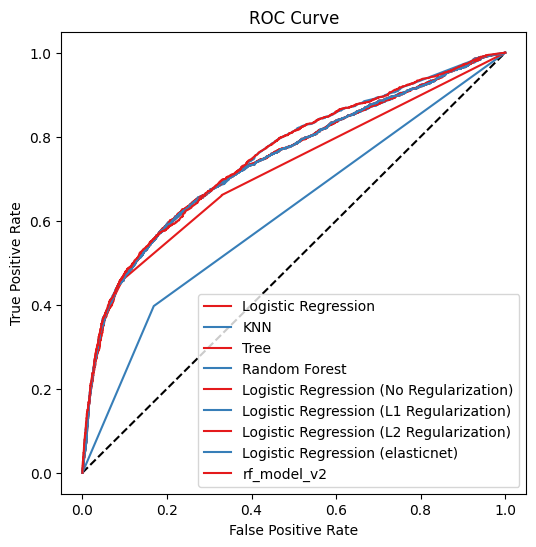

,Model,F1_score,AUC,Accuracy,Precision
0,Logistic Regression,0.442472,0.743801,0.818556,0.690832
1,KNN,0.398587,0.614001,0.735111,0.400405
2,Tree,0.479019,0.717687,0.820667,0.670280
3,Random Forest,0.463488,0.754142,0.821222,0.689484
4,Logistic Regression (No Regularization),0.442472,0.743801,0.818556,0.690832
5,Logistic Regression (L1 Regularization),0.438639,0.743674,0.818556,0.694989
6,Logistic Regression (L2 Regularization),0.386131,0.743608,0.813111,0.706275
7,Logistic Regression (elasticnet),0.442472,0.743799,0.818556,0.690832
8,rf_model_v2,0.472560,0.754392,0.821667,0.683460


In [60]:
calculate_metrics(rf_model_v2, 'rf_model_v2', X_test, y_test)

In [61]:

# Tworzenie modelu drzewa decyzyjnego
d_tree = DecisionTreeClassifier()

# Parametry do GridSearch
params_dt = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}

# Tworzenie obiektu GridSearchCV
dt_gridsearch = GridSearchCV(d_tree,
                             params_dt,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10,
                             n_jobs=-1)

# Trenowanie modelu
dt_gridsearch.fit(X_train, y_train)

# Wyświetlenie najlepszych hiperparametrów
print('\nBest hyperparameters:', dt_gridsearch.best_params_)

# Najlepszy model po wyszukaniu hiperparametrów
dt_model_v2 = dt_gridsearch.best_estimator_


Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 3}


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.37      0.48      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.80      0.82      0.80      9000



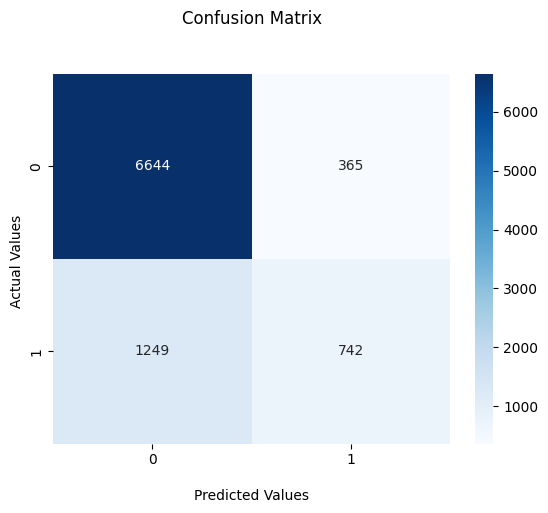

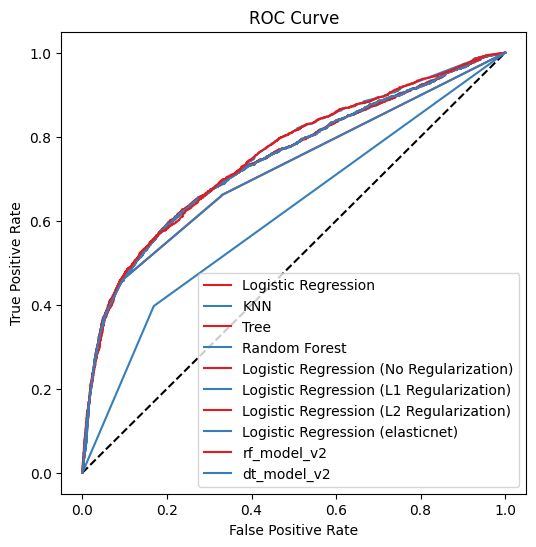

,Model,F1_score,AUC,Accuracy,Precision
0,Logistic Regression,0.442472,0.743801,0.818556,0.690832
1,KNN,0.398587,0.614001,0.735111,0.400405
2,Tree,0.479019,0.717687,0.820667,0.670280
3,Random Forest,0.463488,0.754142,0.821222,0.689484
4,Logistic Regression (No Regularization),0.442472,0.743801,0.818556,0.690832
5,Logistic Regression (L1 Regularization),0.438639,0.743674,0.818556,0.694989
6,Logistic Regression (L2 Regularization),0.386131,0.743608,0.813111,0.706275
7,Logistic Regression (elasticnet),0.442472,0.743799,0.818556,0.690832
8,rf_model_v2,0.472560,0.754392,0.821667,0.683460
9,dt_model_v2,0.479019,0.717687,0.820667,0.670280


In [62]:
calculate_metrics(dt_model_v2, 'dt_model_v2', X_test, y_test)